Text(0.5, 1.0, 'Counts of mutation types')

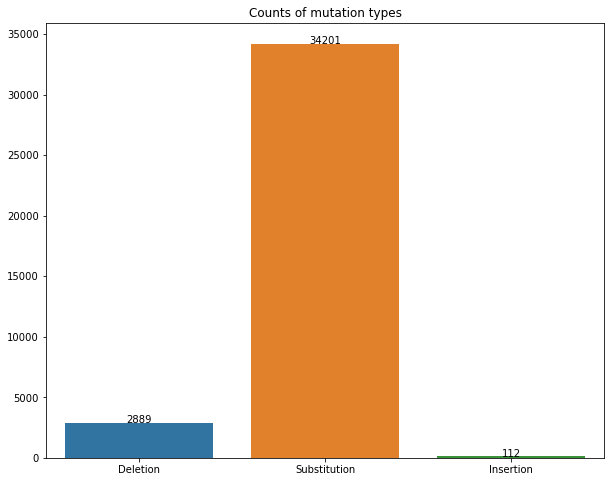

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
counts = [2889,34201,112]
sns.barplot(x=['Deletion','Substitution', 'Insertion'], y=counts)
for i in range(3):
    plt.text(i, counts[i]+10, str(counts[i]), ha='center')

plt.title("Counts of mutation types")


In [10]:
pairs_count={'A-G': 3576,
 'A-C': 575,
 'A-T': 1560,
 'G-A': 2775,
 'G-T': 3033,
 'G-C': 1837,
 'C-T': 14670,
 'C-A': 2023,
 'C-G': 328,
 'T-G': 779,
 'T-C': 2677,
 'T-A': 595}

Text(0.5, 1.0, 'Counts of Substitution mutation pairs - SNP Identification')

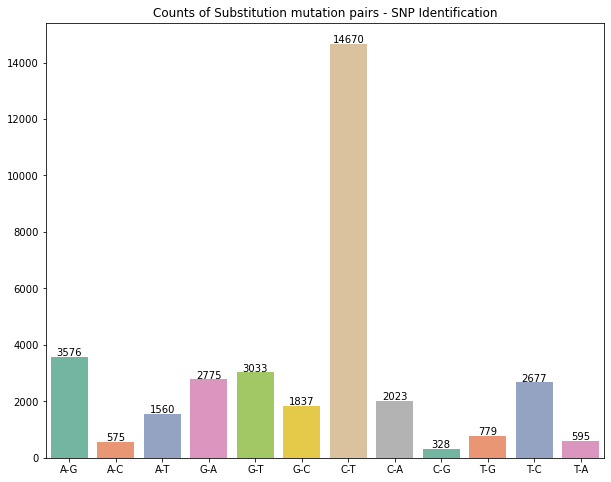

In [17]:
plt.figure(figsize=(10,8))

sns.barplot(x=list(pairs_count.keys()), y=list(pairs_count.values()),palette="Set2")
for i, (key, val) in enumerate(pairs_count.items()):
    plt.text(i, val+30, val, ha='center')

plt.title("Counts of Substitution mutation pairs - SNP Identification")

In [1]:
from Bio import SeqIO
import pandas as pd
import numpy as np

genomes = list(SeqIO.parse('sequences-x.fasta', 'fasta'))

In [2]:
genomes_no_N = list(filter(lambda x: "N" not in x.seq, genomes))
len(genomes_no_N)

14773

In [3]:
selected_genes = []
found = False
for i, gene in enumerate(genomes_no_N):
    if i == 1000:
        break
    if gene.name == 'NC_045512.2':
        found = True
        req_genome = gene
    selected_genes.append(gene)

if not found:
    req_genome = [i for i in genomes_no_N if i.name == 'NC_045512.2'][0]
    selected_genes.pop()
    selected_genes.append(req_genome)
    found = True

print(found, len(selected_genes))
np.random.shuffle(selected_genes)

True 1000


In [4]:
import os

"""
mutation_mx = []
if not os.path.exists("genome_stuff"):
    os.mkdir("genome_stuff")

count = 0
for a_idx, seq_a in enumerate(selected_genes):
    mutation_row = []
    SeqIO.write(seq_a, "genome_stuff/temp_seq_a.fasta", "fasta")
    for b_idx, seq_b in enumerate(selected_genes):
        SeqIO.write(seq_b, "genome_stuff/temp_seq_b.fasta", "fasta")
        if a_idx >= b_idx:
            mutation_row.append(0)
        else:
            os.system(f"GATEkeeper/bin/GATEkeeper -r genome_stuff/temp_seq_a.fasta -q genome_stuff/temp_seq_b.fasta -o genome_stuff/output")
            with open(f"genome_stuff/output.vcf") as f:
                mutation_row.append(len(f.readlines()) - 5)
   
    mutation_mx.append(mutation_row)
"""

'\nmutation_mx = []\nif not os.path.exists("genome_stuff"):\n    os.mkdir("genome_stuff")\n\ncount = 0\nfor a_idx, seq_a in enumerate(selected_genes):\n    mutation_row = []\n    SeqIO.write(seq_a, "genome_stuff/temp_seq_a.fasta", "fasta")\n    for b_idx, seq_b in enumerate(selected_genes):\n        SeqIO.write(seq_b, "genome_stuff/temp_seq_b.fasta", "fasta")\n        if a_idx >= b_idx:\n            mutation_row.append(0)\n        else:\n            os.system(f"GATEkeeper/bin/GATEkeeper -r genome_stuff/temp_seq_a.fasta -q genome_stuff/temp_seq_b.fasta -o genome_stuff/output")\n            with open(f"genome_stuff/output.vcf") as f:\n                mutation_row.append(len(f.readlines()) - 5)\n   \n    mutation_mx.append(mutation_row)\n'

In [5]:
import pandas as pd


#df = pd.DataFrame(mutation_mx)
#g_names = [i.id for i in selected_genes]
#df.index = g_names
#df.columns = g_names
#df.to_csv("mutation_mx_output.csv")

In [6]:
import pandas as pd

#df = pd.read_csv('mutation_mx_output.csv', index_col='Unnamed: 0')
#df.head()

In [7]:
import numpy as np

#mx = np.add(df.values, df.transpose().values)
#mx.shape

In [8]:
from scipy.sparse import csr_matrix

#csr_mx = csr_matrix(mx)

In [9]:
from scipy.sparse.csgraph import minimum_spanning_tree

#Tcsr = minimum_spanning_tree(csr_mx)
#Tcsr_arr = Tcsr.toarray().astype(int)
#pd.DataFrame(Tcsr_arr).to_csv('MST.csv')

In [10]:
mutation_mx2 = []
if not os.path.exists("genome_stuff_testing"):
    os.mkdir("genome_stuff_testing")

count = 0
for a_idx, seq_a in enumerate([req_genome]):
    mutation_row = []
    SeqIO.write(seq_a, "genome_stuff_testing/temp_seq_a.fasta", "fasta")
    for b_idx, seq_b in enumerate(selected_genes):
        SeqIO.write(seq_b, "genome_stuff_testing/temp_seq_b.fasta", "fasta")
        if a_idx >= b_idx:
            mutation_row.append(0)
        else:
            os.system(f"GATEkeeper/bin/GATEkeeper -r genome_stuff_testing/temp_seq_a.fasta -q genome_stuff_testing/temp_seq_b.fasta -o genome_stuff_testing/output_{seq_b.id}")
            with open(f"genome_stuff_testing/output_{seq_b.id}.vcf") as f:
                mutation_row.append(len(f.readlines()) - 5)
   
    mutation_mx2.append(mutation_row)

FileNotFoundError: [Errno 2] No such file or directory: 'genome_stuff_testing/output_OP748534.1.vcf'

In [11]:
import glob

vcf_files = glob.glob('genome_stuff_testing/*.vcf')
print(vcf_files)

vcf_rows = []
for file in vcf_files:
    with open(file) as f:
        rows = list(filter(lambda x: not x.startswith('#'), f.readlines()))
        cleaned_rows = [row.strip().split('\t') for row in rows]
        vcf_rows.extend(cleaned_rows)

vcf_df = pd.DataFrame(vcf_rows, columns=['#CHROM', 'POS', 'ID',	'REF', 'ALT', 'QUAL', 'FILTER', 'INFO'])
vcf_df.head()

[]


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO


In [12]:
vcf_df.to_csv("vcf_merge.csv")

In [13]:
vcf_df = pd.read_csv('~/Downloads/vcf_merge.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Dhruv/Downloads/vcf_merge.csv'

In [14]:
vcf_df['INFO'].value_counts()

Series([], Name: INFO, dtype: int64)

In [15]:
substitute_items = vcf_df[vcf_df['INFO'].str.endswith('SUBSTITUTE')]
delete_items = vcf_df[vcf_df['INFO'].str.endswith('DELETE')]
insert_items = vcf_df[vcf_df['INFO'].str.endswith('INSERT')]

Text(0.5, 1.0, 'Counts of mutation types')

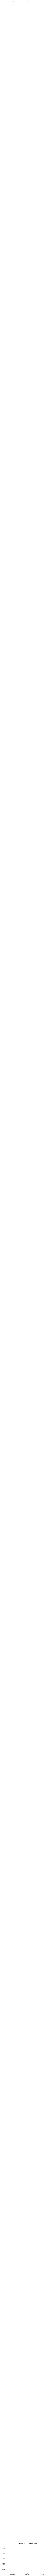

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

counts = [substitute_items.shape[0], delete_items.shape[0], insert_items.shape[0]]
sns.barplot(x=['Substitute', 'Delete', 'Insert'], y=counts)
for i in range(3):
    plt.text(i, counts[i]+10, str(counts[i]), ha='center')

plt.title("Counts of mutation types")

In [17]:
substitute_items['REF'].value_counts()

Series([], Name: REF, dtype: int64)

In [18]:
pairs_count = {}
for each_type in "AGCT":
    subset = substitute_items[substitute_items['REF'] == each_type]
    for (key, val) in subset['ALT'].value_counts().items():
        print(each_type, '-', key, val)
        pairs_count[f"{each_type}-{key}"] = val
    print()

In [19]:
pairs_count

{}

In [20]:
sns.barplot(x=list(pairs_count.keys()), y=list(pairs_count.values()))
for i, (key, val) in enumerate(pairs_count.items()):
    plt.text(i, val+30, val, ha='center')

plt.title("Counts of Substitution mutation pairs - SNP Identification")

ValueError: min() arg is an empty sequence

In [ ]:
ins_del = pd.concat([insert_items, delete_items])
ins_del['REF'].str.len().value_counts()

In [ ]:
ins_del['REF'].str.len().value_counts().plot(kind='bar')
plt.title("Indel Mutations")
plt.xlabel("Number of Indels")
plt.ylabel("Frequency of Indels")

In [ ]:
x = vcf_df['POS'].value_counts()
plt.scatter(x.index, x.values, s=10, color='black')
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.title("Manhattan plot for all mutation types")

In [ ]:
vcf_df.iloc[0, 1]

In [21]:
from scipy.stats import nbinom

n, p = len(vcf_df.iloc[0, 1]), 0.0001

mean, var, skew, kurt = nbinom.stats(n, p, moments='mvsk')
print("Mean:", mean)
print("Variance:", var)

IndexError: single positional indexer is out-of-bounds

In [ ]:
vcf_df.groupby(['POS']).count()